<a href="https://colab.research.google.com/github/rohitk140797k/sentimental-analysis/blob/master/NLP_Session_sentimentAnalysis_Updated_V2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd

# Read Data

In [0]:

sentiment = \
pd.read_csv('imdb_labelled.txt',
                        sep='\t', names = ['comment','label'])



In [4]:
sentiment.shape

(748, 2)

In [5]:
sentiment.describe()

,label
count,748.000000
mean,0.516043
std,0.500077
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,1.000000


In [6]:
sentiment.head()

,comment,label
0,"A very, very, very slow-moving, aimless movie ...",0
1,Not sure who was more lost - the flat characte...,0
2,Attempting artiness with black & white and cle...,0
3,Very little music or anything to speak of.,0
4,The best scene in the movie was when Gerardo i...,1


In [7]:
sentiment.comment[4]

'The best scene in the movie was when Gerardo is trying to find a song that keeps running through his head.  '

In [8]:
sentiment.shape

(748, 2)

In [9]:
sentiment.isnull().sum()

comment    0
label      0
dtype: int64

In [0]:
# We have 748 comments

# Visualize Data

In [11]:
sentiment.head()

,comment,label
0,"A very, very, very slow-moving, aimless movie ...",0
1,Not sure who was more lost - the flat characte...,0
2,Attempting artiness with black & white and cle...,0
3,Very little music or anything to speak of.,0
4,The best scene in the movie was when Gerardo i...,1


In [12]:
sentiment.iloc[0,0]

'A very, very, very slow-moving, aimless movie about a distressed, drifting young man.  '

In [13]:
sentiment.iloc[0,1]

0

In [14]:
sentiment.shape

(748, 2)

In [15]:
sentiment.describe(include='all')

,comment,label
count,748,748.000000
unique,745,NaN
top,10/10,NaN
freq,2,NaN
mean,NaN,0.516043
std,NaN,0.500077
min,NaN,0.000000
25%,NaN,0.000000
50%,NaN,1.000000
75%,NaN,1.000000


In [16]:
import numpy as np
np.sum((sentiment['label']))

386

In [17]:
sentiment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 748 entries, 0 to 747
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   comment  748 non-null    object
 1   label    748 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 11.8+ KB


In [18]:
sentiment.groupby('label').describe()

comment                                
        count unique                 top freq
label                                        
0         362    361  Not recommended.      2
1         386    384             10/10      2

In [19]:
sentiment.isnull().sum()

comment    0
label      0
dtype: int64

In [0]:
%matplotlib inline

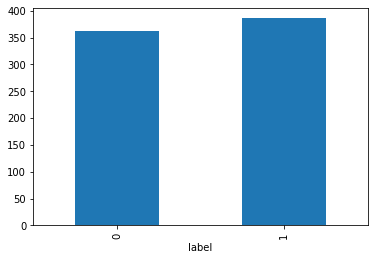

In [23]:
sentiment.groupby('label').size().plot(kind = 'bar')

In [0]:
#verify length of messages and also add it as a column
sentiment['length']= sentiment['comment'].apply(len)

In [26]:
sentiment.head()

,comment,label,length
0,"A very, very, very slow-moving, aimless movie ...",0,87
1,Not sure who was more lost - the flat characte...,0,99
2,Attempting artiness with black & white and cle...,0,188
3,Very little music or anything to speak of.,0,44
4,The best scene in the movie was when Gerardo i...,1,108


In [27]:
sentiment[sentiment['length']>100]

,comment,label,length
2,Attempting artiness with black & white and cle...,0,188
4,The best scene in the movie was when Gerardo i...,1,108
5,"The rest of the movie lacks art, charm, meanin...",0,114
16,"This review is long overdue, since I consider ...",1,111
17,I'll put this gem up against any movie in term...,1,161
...,...,...,...
722,If you haven't choked in your own vomit by the...,0,166
723,"Still, it makes up for all of this with a supe...",1,125
726,Then I watched it again two Sundays ago (March...,1,131
736,It was a riot to see Hugo Weaving play a sex-o...,1,165


In [0]:
sentiment[sentiment['length']>2000]

,comment,label,length
19,The structure of this film is easily the most...,0,4779
136,"In fact, it's hard to remember that the part ...",0,7944
646,"With great sound effects, and impressive spec...",1,4488


In [0]:
#start text processing with vectorizer
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()

In [29]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [34]:
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
  

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [0]:
#define function to clean stopwords
def cleanup_text(msg):
    no_punctuation = [char for char in msg if char not in string.punctuation]
    no_punctuation_msg = ''.join(no_punctuation)
    return [word for word in no_punctuation_msg.split()
            if word.lower() not in stopwords.words('english') ]

In [0]:
checkText = "Catch me if you can is a great movie! with nice thrill and comedy. Leo has done a great job!!"

In [37]:
cleanup_text(checkText)

['Catch',
 'great',
 'movie',
 'nice',
 'thrill',
 'comedy',
 'Leo',
 'done',
 'great',
 'job']

In [0]:
import string
from nltk.corpus import stopwords
bagOfWords = CountVectorizer(analyzer = cleanup_text).fit(sentiment['comment'])

In [39]:
bagOfWords

CountVectorizer(analyzer=<function cleanup_text at 0x7f277108dc80>,
                binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [0]:
#apply transform method for bag of owrds
comment_bagOfWords = bagOfWords.transform(sentiment['comment'])

In [41]:
comment_bagOfWords.shape

(748, 3259)

In [42]:
len(bagOfWords.vocabulary_)

3259

In [43]:
print(bagOfWords.vocabulary_)

{'slowmoving': 2723, 'aimless': 808, 'movie': 2153, 'distressed': 1350, 'drifting': 1377, 'young': 3250, 'man': 2066, 'sure': 2862, 'lost': 2037, 'flat': 1608, 'characters': 1068, 'audience': 889, 'nearly': 2183, 'half': 1741, 'walked': 3143, 'Attempting': 87, 'artiness': 866, 'black': 956, 'white': 3188, 'clever': 1111, 'camera': 1021, 'angles': 837, 'disappointed': 1334, 'became': 931, 'even': 1468, 'ridiculous': 2545, 'acting': 774, 'poor': 2368, 'plot': 2353, 'lines': 2013, 'almost': 817, 'nonexistent': 2206, 'little': 2017, 'music': 2166, 'anything': 848, 'speak': 2760, 'best': 944, 'scene': 2594, 'Gerardo': 300, 'trying': 3020, 'find': 1593, 'song': 2746, 'keeps': 1938, 'running': 2570, 'head': 1762, 'rest': 2530, 'lacks': 1958, 'art': 864, 'charm': 1072, 'meaning': 2090, 'emptiness': 1427, 'works': 3218, 'guess': 1731, 'empty': 1428, 'Wasted': 722, 'two': 3031, 'hours': 1818, 'Saw': 587, 'today': 2969, 'thought': 2940, 'good': 1708, 'effort': 1404, 'messages': 2109, 'kids': 1941

In [0]:
def findWord(index):
    for word, id in bagOfWords.vocabulary_.items():
        if id == index:
            return word

In [0]:
def findindex(kword):
    for word, id in bagOfWords.vocabulary_.items():
        if kword == word:
            return id

In [46]:
findWord(100)

'Babie'

In [47]:
findWord(102)

'Baileys'

In [48]:
comment_bagOfWords.shape

(748, 3259)

In [49]:
sentiment.columns

Index(['comment', 'label', 'length'], dtype='object')

In [50]:
sentiment['comment'][0]

'A very, very, very slow-moving, aimless movie about a distressed, drifting young man.  '

In [51]:
sentiment['comment'].apply(cleanup_text)[0]

['slowmoving', 'aimless', 'movie', 'distressed', 'drifting', 'young', 'man']

In [52]:
print(comment_bagOfWords[0])

  (0, 808)	1
  (0, 1350)	1
  (0, 1377)	1
  (0, 2066)	1
  (0, 2153)	1
  (0, 2723)	1
  (0, 3250)	1


In [53]:
findWord(808)

'aimless'

In [54]:
findWord(809)

'air'

In [55]:
findWord(1350)

'distressed'

In [56]:
findWord(2153)

'movie'

In [57]:
comment_bagOfWords.shape

(748, 3259)

In [58]:
findWord(808)

'aimless'

In [59]:
findWord(1350)

'distressed'

In [60]:
type(comment_bagOfWords)

scipy.sparse.csr.csr_matrix

In [61]:
comment_bagOfWords.toarray()[0]

array([0, 0, 0, ..., 0, 0, 0])

In [62]:
print(comment_bagOfWords[0])

  (0, 808)	1
  (0, 1350)	1
  (0, 1377)	1
  (0, 2066)	1
  (0, 2153)	1
  (0, 2723)	1
  (0, 3250)	1


In [63]:
len(bagOfWords.vocabulary_)

3259

In [0]:
#Apply tfidf transformer and fit the bag of words into it
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer().fit(comment_bagOfWords)

In [65]:
comment_tfidf = tfidf_transformer.transform(comment_bagOfWords)
print(comment_tfidf.shape)

(748, 3259)


In [0]:
# No of documents X no of unique words

In [67]:
type(comment_tfidf)

scipy.sparse.csr.csr_matrix

In [68]:
print(comment_tfidf.getrow(0))

  (0, 3250)	0.3816637284563236
  (0, 2723)	0.4241108183752289
  (0, 2153)	0.16990858097983952
  (0, 2066)	0.3255517277463126
  (0, 1377)	0.4241108183752289
  (0, 1350)	0.4241108183752289
  (0, 808)	0.4241108183752289


In [69]:
findWord(3250)

'young'

In [70]:
findWord(2723)

'slowmoving'

In [0]:
from sklearn.naive_bayes import MultinomialNB
sentiment_model = MultinomialNB().fit(comment_tfidf, sentiment['label'])

In [0]:
from sklearn.linear_model import LogisticRegression

In [73]:
sentiment_model_lr = LogisticRegression()
sentiment_model_lr.fit(comment_tfidf, sentiment['label'])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [74]:
#check model
comment = sentiment['comment'][490:500]
print(comment)
bag_of_words_for_comment = bagOfWords.transform(comment)
tfidf_inst = tfidf_transformer.transform(bag_of_words_for_comment)
print('Predicted class: ', sentiment_model_lr.predict(tfidf_inst))
print('Expected class:  ', sentiment.label[490:500])
print('Predicted class: ', sentiment_model_lr.predict_proba(tfidf_inst) )


490    I can't see how this movie can be an inspirati...
491    It's so bad it's actually worth seeing just fo...
492    Punishment Park is a brilliant piece of cinema.  
493    Shot in the Southern California desert using h...
494    This is one of Peter Watkins most accessible f...
495                   I advise you to look out for it.  
496                                You wont regret it!  
497                              Highly recommended A+  
498    Well... Just if you keep thinking how bad it i...
499    It's a mediocre, miserable, hollow, laughable ...
Name: comment, dtype: object
Predicted class:  [0 0 1 1 1 1 1 1 0 0]
Expected class:   490    0
491    0
492    1
493    1
494    1
495    1
496    1
497    1
498    0
499    0
Name: label, dtype: int64
Predicted class:  [[0.57986059 0.42013941]
 [0.61483787 0.38516213]
 [0.35334257 0.64665743]
 [0.35472252 0.64527748]
 [0.35073447 0.64926553]
 [0.39509542 0.60490458]
 [0.36217344 0.63782656]
 [0.47953442 0.52046558]
 [0.73737

In [75]:
tfidf_inst.shape

(10, 3259)

In [76]:
sentiment_model_lr.predict(tfidf_inst)

array([0, 0, 1, 1, 1, 1, 1, 1, 0, 0])

In [77]:
print('Predicted class: ', sentiment_model_lr.predict(tfidf_inst))
print('Predicted class: ', sentiment_model_lr.predict_proba(tfidf_inst) )
print('Expected class:  ', sentiment.label[500])

Predicted class:  [0 0 1 1 1 1 1 1 0 0]
Predicted class:  [[0.57986059 0.42013941]
 [0.61483787 0.38516213]
 [0.35334257 0.64665743]
 [0.35472252 0.64527748]
 [0.35073447 0.64926553]
 [0.39509542 0.60490458]
 [0.36217344 0.63782656]
 [0.47953442 0.52046558]
 [0.73737817 0.26262183]
 [0.69497067 0.30502933]]
Expected class:   0


In [0]:
# New comments evaluation

In [79]:
comment = "the movie is truely wonderful and well directed"
print(comment)
bag_of_words_for_comment = bagOfWords.transform([comment])
tfidf_inst = tfidf_transformer.transform(bag_of_words_for_comment)
print('Predicted class: ', sentiment_model.predict(tfidf_inst)[0])
print('Expected class:  ', 1)

the movie is truely wonderful and well directed
Predicted class:  1
Expected class:   1


In [0]:
#check accuracy score
from sklearn.metrics import accuracy_score

In [81]:
sentiment.label.shape

(748,)

In [82]:
sentiment_model.predict(tfidf_inst).shape

(1,)

In [83]:
print( "Accuracy score of the model MNB is : ", accuracy_score(sentiment.label,
                                                           sentiment_model.predict(comment_tfidf)))

Accuracy score of the model MNB is :  0.9799465240641712


In [84]:
print( "Accuracy score of the model LR is : ", accuracy_score(sentiment.label,
                                                           sentiment_model_lr.predict(comment_tfidf)))

Accuracy score of the model LR is :  0.9772727272727273


In [0]:
# Split the data between training and testing , and provide the test accuracy
# precision, recall and f1 score
# Explain the drop in accuracy
# How can we improve this
#check the model accuracy on new set of review comments and post
# required to be done by everybody

In [0]:
# Write your analysis of the accuracy/metrics observed